# The Sparks Foundation-GRIP JAN'21
## Data science and business analytics intern at SPARKS FOUNDATION
## Task-2: Prediction using Supervised ML
**Find the optimum number of clusters and represent it visually.**
# By:Onkar Swami

In [47]:
#import the libraries
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline 
from sklearn import datasets
from sklearn.cluster import KMeans

In [48]:
#load the dataset 
df = datasets.load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)

**Let's have a overlook at data**

In [49]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [51]:
df.shape

(150, 4)

In [52]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [54]:
#check for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [55]:
#check if any values are missing
df.isnull().values.any()

False

In [56]:
x = df.iloc[:, [0, 1, 2, 3]].values


### Finding the optimal number of cluster's

In [57]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

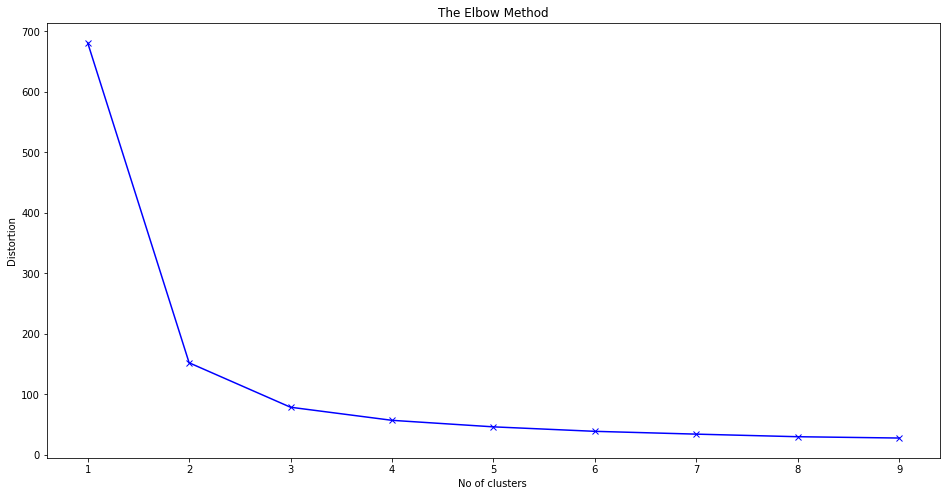

In [58]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters ')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [59]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(x)

In [60]:
Scene = dict(xaxis = dict(title  = 'Iris_sentosa-->'),yaxis = dict(title  = 'Iris_versicolor--->'),zaxis = dict(title  = 'Iris_virginica-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = y_kmeans
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()